# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

Подключил необходимые библиотеки.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # прочитал файл с датасет указав разделить

Загрузил файл с базой данных и сохранил ее в переменную data

In [3]:
display(data.head(5)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Просмотрел как выглядит таблица

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Просмотрел количество столбцов, отдельно записал себе какой тип данных в каждом столбце

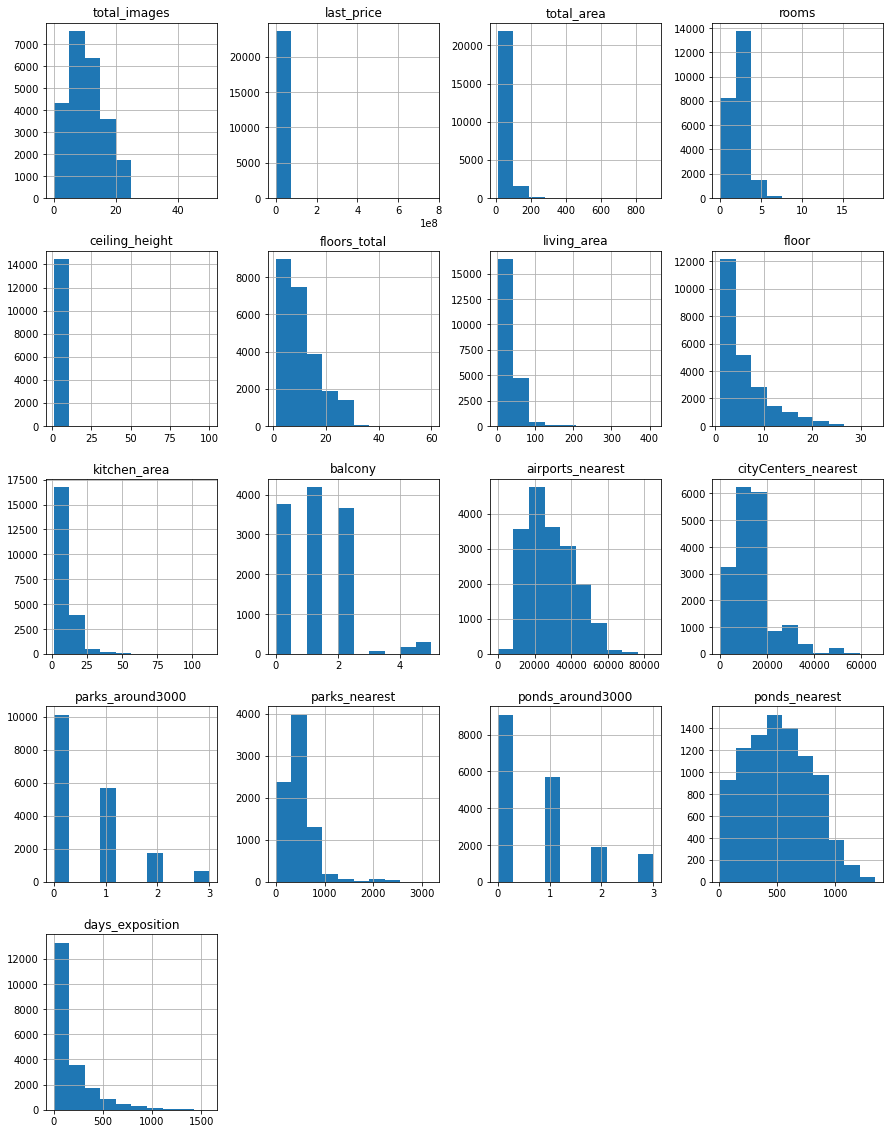

In [5]:
data.hist(figsize=(15, 20)); 

Построил гистаграмы для всей таблицы

## Шаг 2. Предобработка данных.

### Шаг 2.1

In [8]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Проверка на явные дубликаты

In [9]:
print('Количества пропущенных значений', data.isna().sum())

Количества пропущенных значений total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Подсчёт количества пропущенных значений по всем столбцам

In [10]:
print('Количество уникальны значений', data.nunique()) 

Количество уникальны значений total_images              38
last_price              2978
total_area              2182
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              36
living_area             1782
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             971
balcony                    6
locality_name            364
airports_nearest        8275
cityCenters_nearest     7642
parks_around3000           4
parks_nearest            995
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64


Подсчет количества

In [11]:
print(data['total_images'].head(50).isnull().sum())

0


- **total_images** - не нашел аномальные значения и пропущенные значения 

In [12]:
print(data['last_price'].head(50).isnull().sum())

0


- **last_price** - не нашел аномальные значения и пропущенные значения  

In [13]:
print(data['total_area'].head(50).isnull().sum())
data['total_area'] = data['total_area'].replace('12190.0', '12190000.0')

0


- **total_area** - не нашел аномальные значения и пропущенные значения 

In [14]:
data['ceiling_height'].median() # подсчет медианного значения столбца ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # заменил все пропущенные значения на медианные
data = (data[(data['ceiling_height']>2.0) | (data['ceiling_height']<5.0)]) # оставил в data только квартиры с высотой от 2 до 5 метров
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- **ceiling_height** - были обнаружены не верно заполненные данные, данные были исключены из датасета, в выборке остались только от 2-5 метров. Причина ошибки не верно указана высота, например вместо 2.5 м. указано 25.0 м.    

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

- **first_day_exposition** - изменил типа данных в столбце и преобразовал значение столбца функцией pd.to_datetime     

In [16]:
print(data['rooms'].head(50).isnull().sum())

0


- **rooms** - не нашел аномальные значения и пропущенные значения  

In [17]:
data['floors_total'].median() # подсчет медианного значения столбца floors_total 
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()) # заменил все пропущенные значения на медианные
data['floors_total'] = data['floors_total'].astype(int) # изменил тип данных с float на int
data['floors_total'].isnull().sum()
display(data['floors_total'].head(10)) # просмотрел первые 10 значений обновленной таблицы, внешне нет проблем

0    16
1    11
2     5
3    14
4    14
5    12
6    26
7    24
8    27
9     9
Name: floors_total, dtype: int32

- **floors_total** - были обнаружены пропуски в значениях, они были заменены на медианные значения. Ошибки связаны с незаполнением данных пользователем при размещение объявления. Изменил тип данных с float на int  

In [18]:
data['living_area'].isnull().sum()
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.00,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.00,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- **living_area** - были обнаружены пропуски в значениях, они были заменены на медианные значения. Ошибки связаны с незаполнением данных пользователем при размещение объявления  

In [ ]:
data['floor'].isnull().sum()

- **floor** - не нашел аномальные значения и пропущенные значения  

In [19]:
data['is_apartment'].isnull().sum()
data['is_apartment'] = data['is_apartment'].fillna(True)

- **is_apartment** - были обнаружены пропуски в значениях, заменил все Nan на TRUE. Ошибки связаны с незаполнением данных пользователем при размещение объявления 

In [ ]:
data['studio'].isnull().sum() # Nan нет, значения только TRUE и FALSE
display(data['studio'].head(10)) # визуально просмотрел таблицу, вроде нет проблем с данными

- **studio** - не нашел аномальные значения и пропущенные значения  

In [21]:
data['open_plan'].isnull().sum() 
display(data['open_plan'].head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: open_plan, dtype: bool

- **open_plan** - не нашел аномальные значения и пропущенные значения 

In [22]:

data['kitchen_area'].isnull().sum()
display(data['kitchen_area'].head(10))
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].isnull().sum()

0    25.00
1    11.00
2     8.30
3      NaN
4    41.00
5     9.10
6    14.40
7    18.90
8     8.81
9     6.50
Name: kitchen_area, dtype: float64

0

- **kitchen_area** - были обнаружены пропуски в значениях, они были заменены на медианные значения. Ошибки связаны с незаполнением данных пользователем при размещение объявления  

In [24]:
data['balcony'].isnull().sum()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().sum()
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

- **balcony** - были обнаружены пропуски в значениях, заменил все Nan на 0. Ошибки связаны с незаполнением данных пользователем при размещение объявления, если пользователь не указал количество балконов, то считаем что их 0   

In [25]:
data['locality_name'].isnull().sum()
display(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово') 
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data = data.dropna(subset=['locality_name'])
display(len(data['locality_name'].unique()))

365

326

- **locality_name** - обнаружены разные варианты написания одинаковых названий, произведены замены для приведения в соответствие. Следует выбирать название населенного пункта из справочника  

In [26]:
data['airports_nearest'].isnull().sum()
data = data.dropna(subset=['airports_nearest'])
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['airports_nearest'] = (data['airports_nearest'] / 1000).round(0)
data['airports_nearest'].isnull().sum()
display(data['airports_nearest'])

0        19.0
1        13.0
2        22.0
3        28.0
4        32.0
         ... 
23690    20.0
23691    19.0
23693    46.0
23694    25.0
23697    39.0
Name: airports_nearest, Length: 18116, dtype: float64

- **airports_nearest** - были обнаружены пропуски в значениях, они были заменены на 0, значени были переведены в км. и округлены. Ошибки связаны с незаполнением данных пользователем при размещение объявления  

In [27]:
data = data.rename(columns={'cityCenters_nearest':'city_сenters_nearest'})
data['city_сenters_nearest'].isnull().sum()
data['city_сenters_nearest'] = data['city_сenters_nearest'].fillna(0)
data['city_сenters_nearest'] = (data['city_сenters_nearest'] / 1000).round(0)
data['city_сenters_nearest'].isnull().sum()

0

- **cityCenters_nearest** - столбец был переименован в **city_сenters_nearest** были обнаружены пропуски в значениях, они были заменены на 0, значения были переведены в км. и округлены. Ошибки связаны с незаполнением данных пользователем при размещение объявления   

In [28]:
data['parks_around3000'].isnull().sum()
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isnull().sum()
data['parks_around3000'].unique()

array([1., 0., 2., 3.])

- **parks_around3000** - были обнаружены пропуски в значениях, они были заменены на 0, значения были переведены в км. и округлены. Ошибки связаны с незаполнением данных пользователем при размещение объявления  

In [29]:
data['parks_nearest'].isnull().sum()
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'] = (data['parks_nearest'] / 1000).round(1)
data['parks_nearest'].unique()

array([0.5, 0. , 0.1, 0.3, 0.6, 0.4, 0.8, 0.2, 0.7, 1.1, 1.2, 0.9, 1. ,
       2.3, 1.5, 2.1, 1.4, 2.2, 1.7, 1.8, 3.1, 2.7, 2.9, 1.3, 2.5, 1.6,
       2.8, 2.4, 1.9, 2. , 2.6, 3.2, 3. ])

- **parks_nearest** - были обнаружены пропуски в значениях, они были заменены на 0, значения были переведены в км. и округлены. Ошибки связаны с незаполнением данных пользователем при размещение объявления   

In [30]:
data['ponds_around3000'].isnull().sum()
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].unique()

array([2., 0., 3., 1.])

- **ponds_around3000** - были обнаружены пропуски в значениях, они были заменены на 0. Ошибки связаны с незаполнением данных пользователем при размещение объявления. Если поле осталось не заполлненным, то предполагаем, что водоемов 0.   

In [31]:
data['ponds_nearest'].isnull().sum()
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'] = (data['ponds_nearest'] / 1000).round(1)
data['ponds_nearest'].unique()

array([0.8, 0. , 0.6, 0.2, 0.3, 0.1, 0.9, 0.4, 1.2, 0.5, 1. , 0.7, 1.1,
       1.3])

- **ponds_nearest**- были обнаружены пропуски в значениях, они были заменены на 0, значения были переведены в км. и округлены. Ошибки связаны с незаполнением данных пользователем при размещение объявления   

In [32]:
data['days_exposition'].isnull().sum()
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'].unique()

array([  0.,  81., 558., ..., 800., 777., 971.])

- **days_exposition** - были обнаружены пропуски в значениях, они были заменены на 0, скорее всего ошибка в БД, т.к. данное значение должно расчитываться автоматически   

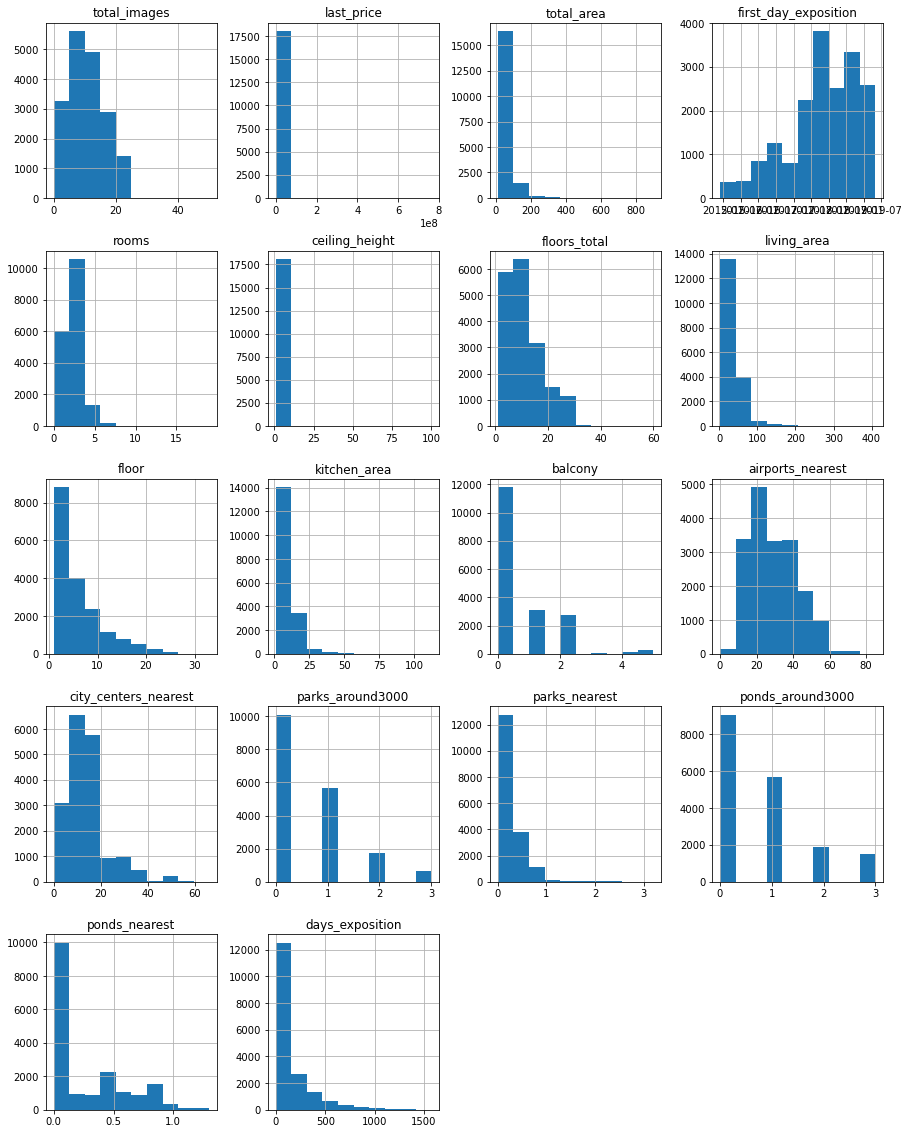

In [33]:
data.hist(figsize=(15, 20));

Построил гистаграмы для всей таблицы повторно посмотрел графики

### Шаг 2.2

**Изменен тип данных (Dtype) у следующих столбцов:**    
- **first_day_exposition** с object на datetime64 - время хранилось в виде строки и не было возможности с ним работать.  
- **is_apartment** с object на bool - в таблице хранятся значения bool.  
- **floors_total** - изменил тип данных с float на int.

### Шаг 2.3

**Неявные дубликаты**  
- В столбце **locality_name** были произведены замены: 'ё', 'е'; 'поселок городского типа Рябово', 'поселок Рябово'; 'поселок при железнодорожной станции Вещево', 'поселок станции Вещево'; 'поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское'; 'поселок Мурино', 'Мурино'.

### Шаг 2.4

**Найдите редкие и выбивающиеся значения**  
- В столбце **ceiling_height** были обнаружены не верно заполненные данные, т.к. количество таких данных было не больлшим, данные были исключены из датасета, в выборке остались только квартиры с высотой потолков от 2-5 метров.  
Причина ошибки не верно указана высота, например вместо 2.5 м. указано 25.0 м.  

В хоте проделанной работы, я произвел подготовку БД для дальнейшего анализа:  
- была произведена проверка на явные дубликаты;  
- были выявлены и скорректированы не явные дубликаты;  
- были заменены пропущенные данные, в некоторых случаях на медианные значаения, в некоторых были заменены на 0 значения;  
- были преобразованы типы данных для столбцов, для удобства работы;  
- были удалены строки с пропущенными данными которые не удалось заполнить;  
- были скорректированы данные, аномалию которых удалось установить.  

### Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами. 

In [34]:
## стоимость одного квадратного метра
data['cost_metr'] = data['last_price'] / data['total_area'] # разделил стоимоть квартиры на площадь
data['cost_metr'] = data['cost_metr'].round(0) # округлил стоимость одного м2.
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_metr
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0.0,Санкт-Петербург,19.0,16.0,1.0,0.5,2.0,0.8,0.0,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,2.0,поселок Шушары,13.0,19.0,0.0,0.0,0.0,0.0,81.0,82921.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,0.0,Санкт-Петербург,22.0,14.0,1.0,0.1,2.0,0.6,558.0,92786.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,0.0,Санкт-Петербург,28.0,7.0,2.0,0.1,3.0,0.2,424.0,408176.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0.0,Санкт-Петербург,32.0,8.0,2.0,0.1,1.0,0.0,121.0,100000.0


In [35]:
## день недели публикации объявления
data['date'] = data['first_day_exposition'].dt.weekday # сохранил в столбец date номерад дней недели
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_metr,date
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,Санкт-Петербург,19.0,16.0,1.0,0.5,2.0,0.8,0.0,120370.0,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,поселок Шушары,13.0,19.0,0.0,0.0,0.0,0.0,81.0,82921.0,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,Санкт-Петербург,22.0,14.0,1.0,0.1,2.0,0.6,558.0,92786.0,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,Санкт-Петербург,28.0,7.0,2.0,0.1,3.0,0.2,424.0,408176.0,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,Санкт-Петербург,32.0,8.0,2.0,0.1,1.0,0.0,121.0,100000.0,1


In [36]:
## месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month # созранил в столбце month номер месяца
(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_metr,date,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,19.0,16.0,1.0,0.5,2.0,0.8,0.0,120370.0,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,13.0,19.0,0.0,0.0,0.0,0.0,81.0,82921.0,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,22.0,14.0,1.0,0.1,2.0,0.6,558.0,92786.0,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,28.0,7.0,2.0,0.1,3.0,0.2,424.0,408176.0,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,32.0,8.0,2.0,0.1,1.0,0.0,121.0,100000.0,1,6


In [37]:
## год публикации объявления
data['year'] = data['first_day_exposition'].dt.year # сохранил в столбце year год публицации объявления
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_metr,date,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16.0,1.0,0.5,2.0,0.8,0.0,120370.0,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,19.0,0.0,0.0,0.0,0.0,81.0,82921.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,14.0,1.0,0.1,2.0,0.6,558.0,92786.0,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,7.0,2.0,0.1,3.0,0.2,424.0,408176.0,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8.0,2.0,0.1,1.0,0.0,121.0,100000.0,1,6,2018


In [38]:
## определяем тип этажа и записываем в столбец floor_type
data.loc[(data['floor'] == 1), 'floor_type'] = 'первый'
data.loc[(data['floor'] == data['floors_total']), 'floor_type'] = 'последний'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_type'] = 'другой'
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_metr,date,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,1.0,0.5,2.0,0.8,0.0,120370.0,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,0.0,0.0,0.0,81.0,82921.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,1.0,0.1,2.0,0.6,558.0,92786.0,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,2.0,0.1,3.0,0.2,424.0,408176.0,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,2.0,0.1,1.0,0.0,121.0,100000.0,1,6,2018,другой


In [40]:
## определяем тип этажа и записываем в столбец floor_type_sns для построения графика
data.loc[(data['floor'] == 1), 'floor_type_sns'] = 1
data.loc[(data['floor'] == data['floors_total']), 'floor_type_sns'] = 2
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_type_sns'] = 3
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_metr,date,month,year,floor_type,floor_type_sns
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0.5,2.0,0.8,0.0,120370.0,3,3,2019,другой,3.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,0.0,0.0,81.0,82921.0,1,12,2018,первый,1.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,0.1,2.0,0.6,558.0,92786.0,3,8,2015,другой,3.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,0.1,3.0,0.2,424.0,408176.0,4,7,2015,другой,3.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0.1,1.0,0.0,121.0,100000.0,1,6,2018,другой,3.0


### Шаг 4. Проведите исследовательский анализ данных.

### Шаг 4.1 Изучите следующие параметры

Общая площадь AxesSubplot(0.125,0.125;0.775x0.755)


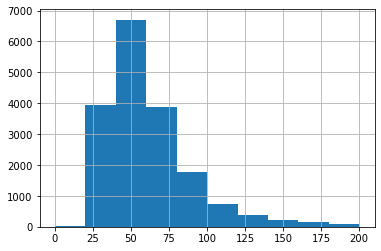

In [45]:
print('Общая площадь',data['total_area'].hist(range = (0, 200), bins=10))
plt.show()

- **Общая площадь** продаваемых квартир варьируется от 23м2 до 100м2. Больше всего продается квартиры с площадью от 40м2 - 60м2. Квартир с площадью более 100м2 представлено достаточно мало.  

Жилая площадь AxesSubplot(0.125,0.125;0.775x0.755)


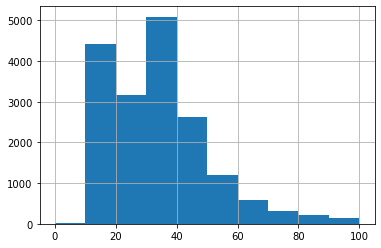

In [46]:
print('Жилая площадь',data['living_area'].hist(range = (0, 100), bins=10));
plt.show()

- **Жилая площадь** в продаваемых квартирах находится в диапазоне от 15м2 до 40м2. Наблюдается спад в районе 30м2. После 40м2 наблюдается равномерное снижение.  

Площадь кухни AxesSubplot(0.125,0.125;0.775x0.755)


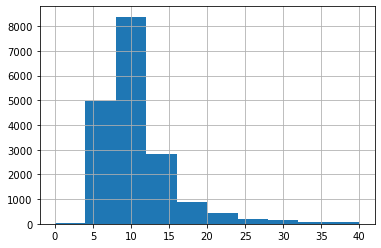

In [47]:
print('Площадь кухни',data['kitchen_area'].hist(range = (0, 40), bins=10))
plt.show()

- **Площадь кухни** в продаваемых квартирах находится в диапазоне от 5м2 до 10м2. После 12 м2 наблюдается резкий спад.   

Цена объекта AxesSubplot(0.125,0.125;0.775x0.755)


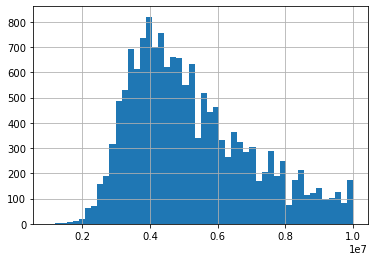

In [48]:
print('Цена объекта',data['last_price'].hist(range = (1000000, 10000000), bins=50))#, figsize=(20, 10)))
plt.show()

- **Цена объекта** находится в диапазоне от 500 т.р. до 500 млн.р., стоимость распределилась равномерно, с пиком в районе от 25 млн.р. до 60 млн.р.  

Количество комнат AxesSubplot(0.125,0.125;0.775x0.755)


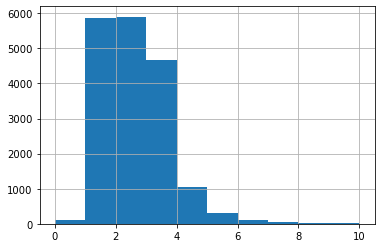

In [49]:
print('Количество комнат',data['rooms'].hist(range = (0, 10), bins=10))#, figsize=(20, 10)))
plt.show()

- **Количество комнат** в продаваемых квартирах в своем большинстве составляет от 1 до 3, значительно меньше от 4 до 4.  

Высота потолков AxesSubplot(0.125,0.125;0.775x0.755)


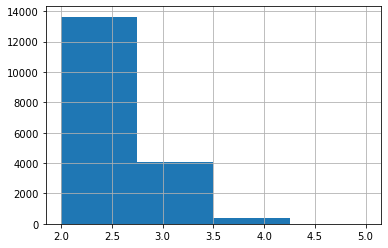

In [50]:
print('Высота потолков',data['ceiling_height'].hist(range = (2, 5), bins=4))#, figsize=(20, 10)))
plt.show()

- **Высота потолков** - находится в диапазоне от 2м. до 2,75м. и от 2.75 до 3.5. Квартиры с высотой потолков выше 5м. в выборку не попали.  

Этаж квартиры AxesSubplot(0.125,0.125;0.775x0.755)


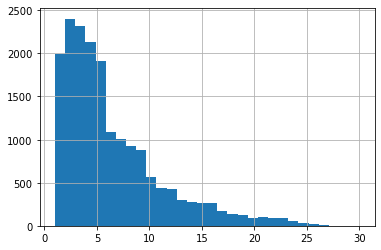

In [51]:
print('Этаж квартиры',data['floor'].hist(range = (1, 30), bins=30))#, figsize=(10, 10)))
plt.show()

- **Этаж продаваемых квартир** большинство квартир продаются с 1 по 7 этаж, с выраженным увеличением в районе 2 и 3 этажей. После 7 этажа идет равномерный спад.

Тип этажа AxesSubplot(0.125,0.125;0.775x0.755)


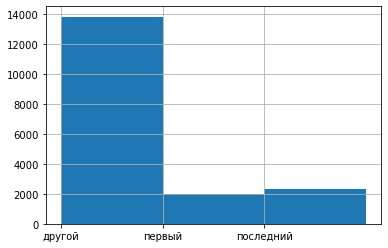

In [52]:
print('Тип этажа',data['floor_type'].hist(range = (0, 3), bins=3))#, figsize=(10, 10)))
plt.show()

- **Тип этажа** данные между крайними этажами распределились равномерно, по графику мы видимо, что большая часть квартир продается на средних этажах.  

Общее количество этажей в доме AxesSubplot(0.125,0.125;0.775x0.755)


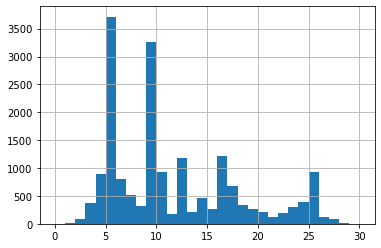

In [53]:
print('Общее количество этажей в доме',data['floors_total'].hist(range = (0, 30), bins=30))#, figsize=(10, 10)))
plt.show()

- **Количество этажей в доме** из представленного графика видно, что большая часть квартир продается в 5, 9 и 16 этажных домах. Остальные дома распределились равномерно от общего количества.  

Расстояние от центра города AxesSubplot(0.125,0.125;0.775x0.755)


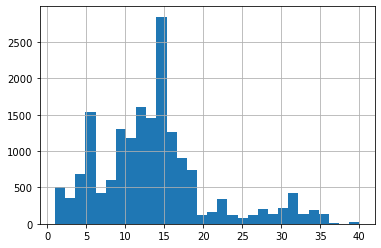

In [54]:
print('Расстояние от центра города',data['city_сenters_nearest'].hist(range = (1, 40), bins=30))#, figsize=(10, 10)))
plt.show()

- **Расстояние от центра города** расстояние распределилось от 7 до 17 км., ярко выраженные участки 5 и 15 км. 

Расстояние от аэропорта AxesSubplot(0.125,0.125;0.775x0.755)


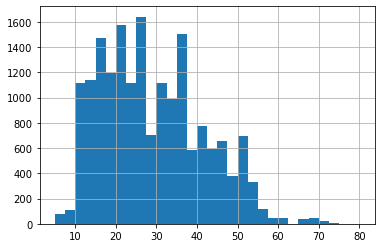

In [55]:
print('Расстояние от аэропорта',data['airports_nearest'].hist(range = (5, 80), bins=30));#, figsize=(10, 10)))
plt.show()

- **Расстояние от аэропорта** в среднем значения распределились от 10 до 35 км., после 35 км. идет равномерный спад.

Расстояние до ближайшего парка AxesSubplot(0.125,0.125;0.775x0.755)


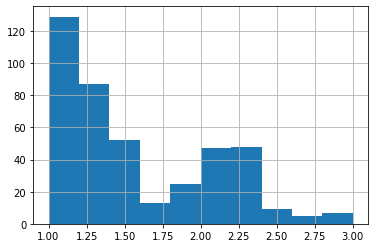

In [56]:
print('Расстояние до ближайшего парка',data['parks_nearest'].hist(range = (1, 3), bins=10))#, figsize=(10, 10)))
plt.show()

- **Расстояние до парка** в большинстве случаев квартиры находятся на расстоянии от 1 до 1,5 км. до парка и далее наблюдается увеличение в диапазоне от 2 до 2,25 км. 

День публикации объявления AxesSubplot(0.125,0.125;0.775x0.755)
Месяц публикации объявления AxesSubplot(0.125,0.125;0.775x0.755)


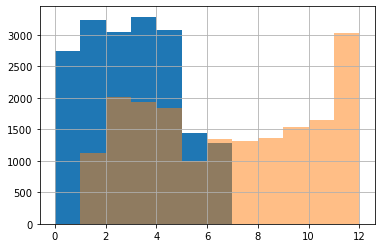

In [57]:
print('День публикации объявления',data['date'].hist(range = (0, 8), bins=8));#, figsize=(10, 10)))
print('Месяц публикации объявления',data['month'].hist(range = (0, 12), bins=12, alpha = 0.5));#, figsize=(10, 10)))
plt.show()

- **День и месяц размещения объявления** по графику видно, что больше всего объявлений размещали в декабре и в весенние месяцы, летом наблюдается незначительный спад. По дням недели видно, что в выходные дни размещают в 2 раза меньше объявлений чем в рабочие дни, пик размещений приходится на вторник и четверг. 

### Шаг 4.2 Как быстро продавались квартиры

Как быстро продавались квартиры AxesSubplot(0.125,0.125;0.775x0.755)
Средний срок продажи квартиры составляет: 159.09367410024288
Медианный срок продажи квартиры составляет: 75.0


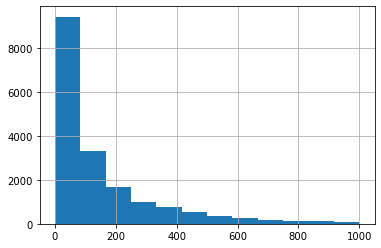

In [58]:
print('Как быстро продавались квартиры',data['days_exposition'].hist(range = (0, 1000), bins=12))#, figsize=(10, 10)))
print('Средний срок продажи квартиры составляет:', data['days_exposition'].mean())
print('Медианный срок продажи квартиры составляет:', data['days_exposition'].median())
plt.show()

- Средний срок продажи квартиры составляет: 159 дней.
- Медианный срок продажи квартиры составляет: 75 дней.
- **Изучите, как быстро продавались квартиры** - по графику мы видим, что большинство квартир продавались с срок до 200 дней, средний срок по всей выборке состаивл 159 дней. Медианное значение составило 75 дней. Исходя из этого я могу сделать вывод, что нормальным сроком для продажи квартиры является срок равный 100-115 дней или от 3 до 4 месяцев. Объявление имеющий срок больше одного года являются необычно долгими. 

### Шаг 4.3 Какие факторы больше всего влияют на общую стоимость

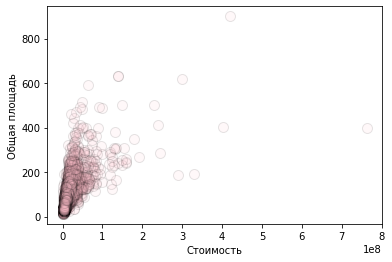

In [59]:
x1 = data['last_price']
y1 = data['total_area']
plt.scatter(x1, y1, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("Общая площадь")
plt.show()

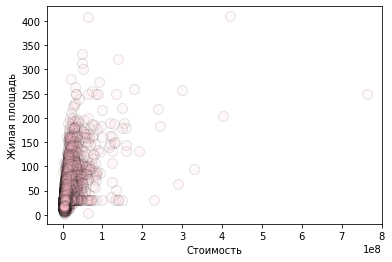

In [60]:
x1 = data['last_price']
y1 = data['living_area']
plt.scatter(x1, y1, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("Жилая площадь")
plt.show()

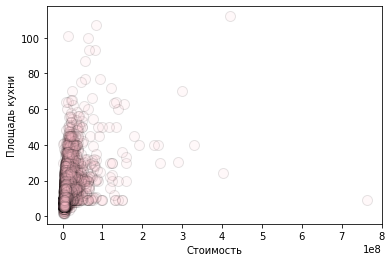

In [61]:
x1 = data['last_price']
y2 = data['kitchen_area']
plt.scatter(x1, y2, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("Площадь кухни")
plt.show()

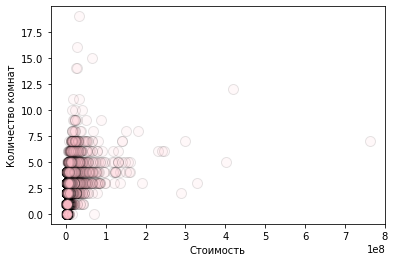

In [62]:
x1 = data['last_price']
y3 = data['rooms']
plt.scatter(x1, y3, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("Количество комнат")
plt.show()

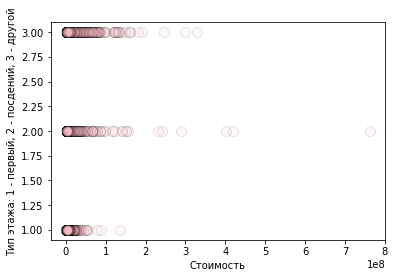

In [63]:
x1 = data['last_price']
y4 = data['floor_type_sns']
plt.scatter(x1, y4, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("Тип этажа: 1 - первый, 2 - посдений, 3 - другой")
plt.show()

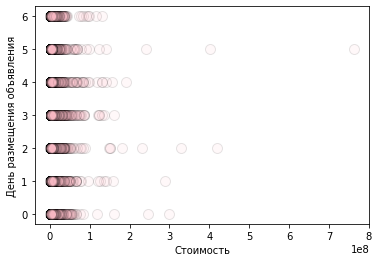

In [64]:
x1 = data['last_price']
y5 = data['date']
plt.scatter(x1, y5, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("День размещения объявления")
plt.show()

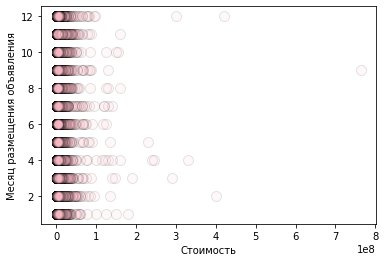

In [65]:
x1 = data['last_price']
y6 = data['month']
plt.scatter(x1, y6, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("Месяц размещения объявления")
plt.show()

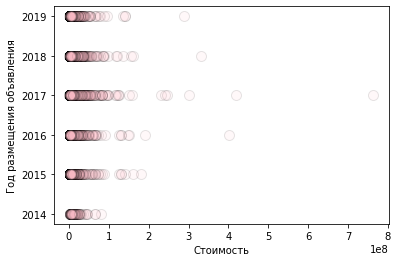

In [66]:
x1 = data['last_price']
y7 = data['year']
plt.scatter(x1, y7, c ="pink", linewidths = 1, marker ="o", edgecolor ="black", alpha = 0.1, s = 100)
plt.xlabel("Стоимость")
plt.ylabel("Год размещения объявления")
plt.show()

[[<AxesSubplot:title={'center':'living_area'}>]]


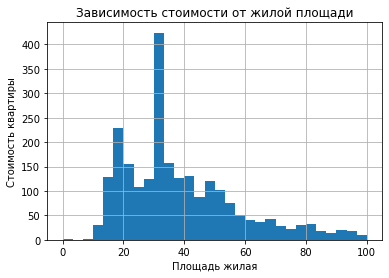

In [67]:
living_area = data.pivot_table(index='last_price', values='living_area')
print(living_area.hist(bins=30, range = (0, 100)))
plt.xlabel('Площадь жилая')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость стоимости от жилой площади')
plt.show()

- **Зависимость от жилой площади** - по построенному графику вижу зависимость, что самая высокая стоимость у квартир, имеющих жилую площадь равную 20 – 30 м2. Чем больше жилая площадь, тем ниже стоимость.   

[[<AxesSubplot:title={'center':'kitchen_area'}>]]


Text(0.5, 1.0, 'Зависимость стоимости от площади кухни')

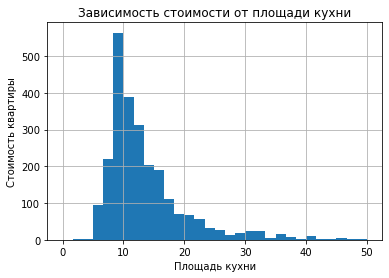

In [68]:
kitchen_area = data.pivot_table(index='last_price', values='kitchen_area')
print(kitchen_area.hist(bins=30, range = (0, 50), grid=True))
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость стоимости от площади кухни')

- **Зависимость от площади кухни** - по построенному графику вижу зависимость, что самая высокая стоимость у квартир, имеющих площадь кухни около 10 м2., чем больше площадь кухни, тем ниже стоимость квартиры.  

[[<AxesSubplot:title={'center':'rooms'}>]]


Text(0.5, 1.0, 'Зависимость стоимости от количества комнат')

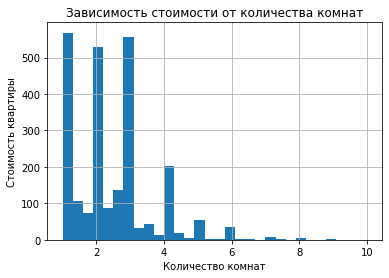

In [69]:
rooms = data.pivot_table(index='last_price', values='rooms')
print(rooms.hist(bins=30, range = (1, 10)))
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость стоимости от количества комнат')

- **Зависимость от количества комнат** - по построенному графику вижу, что самая высокая стоимость у квартир, имеющих от 1 до 3 комнат, далее вижу, что чем больше комнат, тем ниже стоимость.  

Text(0.5, 1.0, 'Зависимость стоимости от количества комнат')

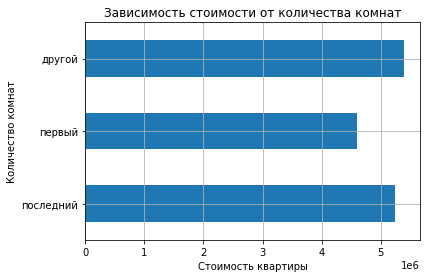

In [70]:
floor_type_plt = data.pivot_table(index='floor_type', values='last_price', \
aggfunc='median').sort_values('floor_type', ascending=False)
floor_type_plt.plot(y='last_price', kind='barh', legend=False, grid=True)
plt.ylabel('Количество комнат')
plt.xlabel('Стоимость квартиры')
plt.title('Зависимость стоимости от количества комнат')

- **Зависимость от этажа, на котором расположена квартира (первый, последний, другой)** - по графику видно, что меньше всего квартир на первом этаже, на втором месте расположились квартиры на последнем этаже. В своем большинстве квартиры на средних этажах.  

Text(0.5, 1.0, 'Зависимость стоимости от дня размещения')

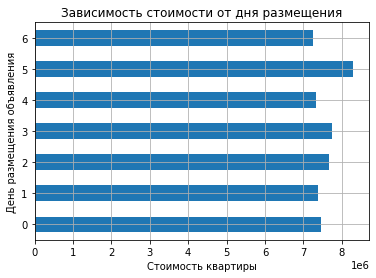

In [71]:
date = data.pivot_table(index='date', values='last_price')
date.plot(y='last_price', kind='barh', legend=False, grid=True)
plt.ylabel('День размещения объявления')
plt.xlabel('Стоимость квартиры')
plt.title('Зависимость стоимости от дня размещения')

- **Зависимость от даты размещения (день недели, месяц, год)** - по графику вижу, что самая высокая стоимость у квартир, чьи объявления были размещены в субботу, в воскресенье самая низкая стоимость. Остальные дни распределились равномерно, с незначительным увеличением в среду и четверг.   

Text(0.5, 1.0, 'Зависимость стоимости от года размещения')

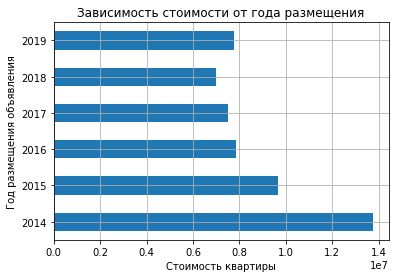

In [72]:
year = data.pivot_table(index='year', values='last_price')
year.plot(y='last_price', kind='barh', legend=False, grid=True)
plt.ylabel('Год размещения объявления')
plt.xlabel('Стоимость квартиры')
plt.title('Зависимость стоимости от года размещения')

- **Зависимость от года размещения** - объявления размещенные в 2014 имели большую стоимость, видна зависимость как стоимость снижалась с 2014 по 2018 год, в 2019 году стоимость увеличилась.  

Text(0.5, 1.0, 'Зависимость стоимости от месяца размещения')

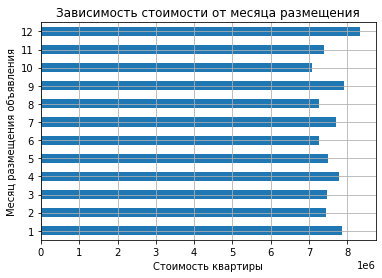

In [73]:
month = data.pivot_table(index='month', values='last_price')
month.plot(y='last_price', kind='barh', legend=False, grid=True)
plt.ylabel('Месяц размещения объявления')
plt.xlabel('Стоимость квартиры')
plt.title('Зависимость стоимости от месяца размещения')

- **Зависимость от месяца размещения** - самая высокая стоимость у объявлений, размещенных в декабре. 

### Шаг 4.4 Посчитайте среднюю цену одного м2 в 10 населенных пунктах с наибольшим числом объявлений, выделите населенные пункты с самой низкой и самой высокой стоимостью

In [74]:
print('10 населенных пунктов с наибольшим количеством объявлений')
cost_metr = data.pivot_table(index='locality_name', values='cost_metr', aggfunc=('count', 'median')).sort_values(by='count',ascending=False).head(10)
display(cost_metr)

10 населенных пунктов с наибольшим количеством объявлений


,count,median
locality_name,,
Санкт-Петербург,15636,104667.5
поселок Шушары,436,76748.0
Пушкин,369,100000.0
Колпино,337,74722.0
поселок Парголово,327,91643.0
Петергоф,201,82143.0
Сестрорецк,183,99678.0
Красное Село,176,71685.5
Ломоносов,132,71817.0


In [75]:
print('Населенный пункт с самой высокой стоимостью:')
display(cost_metr.query('median == median.max()'))

Населенный пункт с самой высокой стоимостью:


,count,median
locality_name,,
Санкт-Петербург,15636,104667.5


In [76]:
print('Населенный пункт с самой низкой стоимостью')
display(cost_metr.query('median == median.min()'))

Населенный пункт с самой низкой стоимостью


,count,median
locality_name,,
Красное Село,176,71685.5


### Шаг 4.5 Средняя стоимость км. для Санкт-Петербурга

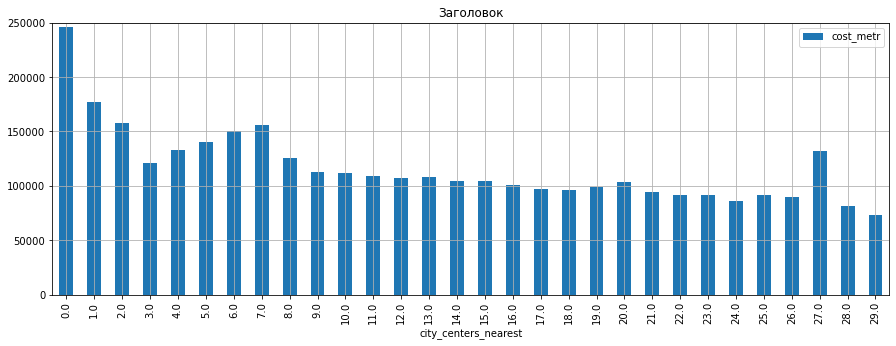

In [77]:
data_spb = data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_сenters_nearest'].isna() == False)] # сделал выборку для Санкт-Петербург
df_spb = data_spb['cost_metr'] / data_spb['city_сenters_nearest'] # Расчитал стоимость 1 км
df_spb = df_spb.mean()
df_spb = data[data['locality_name'] == 'Санкт-Петербург']
spb_price = df_spb.pivot_table(index = 'city_сenters_nearest', values = 'cost_metr')
spb_price.plot(y='cost_metr', style='o', ylim=(0, 250000), kind='bar', grid=True, figsize=(15, 5), title = 'Заголовок');

- **Как стоимость объектов зависит от расстояния до центра города** - исходя из выборки, я сделал вывод, что самая высокая стоимость за квадратный метр находится в центре города. Далее стоимость равномерно снижается, но после 4 км. стоимость снова растет и только после 7 км. снова видно снижение стоимости. Максимальная стоимость квадратного метра в центре города составляет 250 т.р. за 1м2, в 30 км от цента стоимость одного м2 составляет 72 т.р.

### Шаг 5. Общий вывод
Я провел анализ объявлений и внимательно изучил предоставленные данные. В результате я сделал некоторые выводы:  
- на стоимость квартиры влияют многие факторы, некоторые оказывают сильное влияние, некоторые незначительное, так, например,:
- чем ближе квартира расположена к центру города, тем ее стоимость выше и наоборот;
- больше всего продаются квартиры расположенных средних этажах, со второго по 7;
- обычно квартиры располагаются в 5, 9 и 16 этажных домах;
- общая жилая площадь квартир составляет от 23м2 до 100м2.;
- большинство продаваемых квартир имеют от 1 до 3 комнат;
- самая высокая стоимость у квартир с площадью 50 м2.